In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mouse_viral_study.csv')
df.head()

Med_1_mL  Med_2_mL  Virus Present
0  6.508231  8.582531              0
1  4.126116  3.073459              1
2  6.427870  6.369758              0
3  3.672953  4.905215              1
4  1.580321  2.440562              1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
df['Virus Present'].value_counts()

Virus Present
0    200
1    200
Name: count, dtype: int64

### EDA

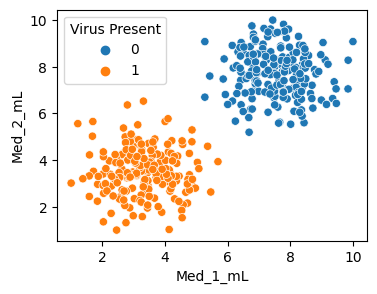

In [5]:
plt.figure(figsize=(4, 3))
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', data=df, hue='Virus Present')
plt.show()

In [6]:
X = df[['Med_1_mL', 'Med_2_mL']]
y = df['Virus Present']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

Train = []
Test = []
CV = []

for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    ypred_train = model.predict(X_train)
    ypred_test = model.predict(X_test)

    Train.append(model.score(X_train, y_train))
    # print('Train R2:', r2_score(y_train, ypred_train))
    Test.append(model.score(X_test, y_test))
    # print('Test R2:', r2_score(y_test, ypred_test))

    CV.append(cross_val_score(model, X_train, y_train, cv=5).mean())


em = pd.DataFrame({'Train':Train, 'Test':Test, 'CV':CV})
gm = em[(abs(em['Train']-em['Test']) <= 0.05) & (abs(em['Test']-em['CV']) <=0.05)]
print('best random state number:', gm[gm['Test']==gm['Test'].max()].index.to_list())

best random state number: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Logistic Regression Model

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Modeling
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)


# prediction
ypred_train = model1.predict(X_train)
ypred_test = model1.predict(X_test)

# train accuracy
from sklearn.metrics import accuracy_score
print('Train Accuracy:', accuracy_score(y_train, ypred_train))

# CV Score
from sklearn.model_selection import cross_val_score
print('CV Score:', cross_val_score(model1, X_train, y_train, cv=5, scoring='accuracy').mean())

# test accuracy
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 1.0
CV Score: 1.0
Test Accuracy: 1.0


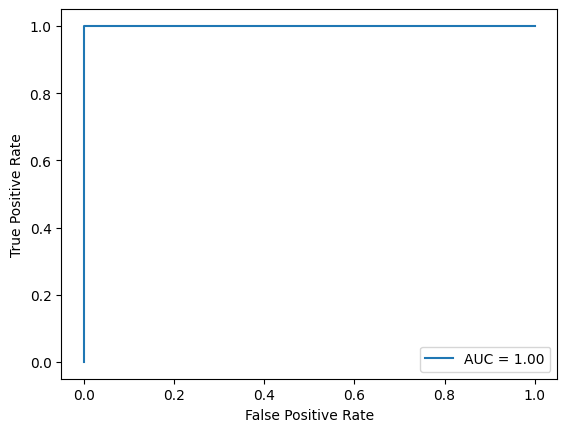

1.0


In [11]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
fpr, tpr, thresolds = roc_curve(y_test, ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()
print(roc_auc)

In [12]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, ypred_test)

1.0

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred_test)
cm

array([[42,  0],
       [ 0, 38]], dtype=int64)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        38

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# KNN Model

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modelling with default parameters (KNN)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Prediction
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model, X, y, cv=5)
print(scores)
print(scores.mean())

1.0
1.0
[1. 1. 1. 1. 1.]
1.0


### Choosing best K value
### Hyperparameter Tuning for KNN Classifier

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors' : list(range(1, 31)), 'p':[1, 2]}

full_cv_classifier = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(X_train, y_train)
full_cv_classifier.best_params_

{'n_neighbors': 1, 'p': 1}

### Rebuild KNN Model with best hyper parameters

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=20, p=2)
knn_model.fit(X_train, y_train)

# Prediction
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model, X, y, cv=5)
print(scores)
print(scores.mean())

1.0
1.0
[1. 1. 1. 1. 1.]
1.0


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[42,  0],
       [ 0, 38]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        38

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# Support Vector Machines (SVM)

In [21]:
# modelling
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Prediction
ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, ypred_train))
print(accuracy_score(y_test, ypred_test))

1.0
1.0


### Hyperparameter tuning

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
estimator = SVC()
param_grid = {'C' : [0.01, 0.1, 1, 10, 100], 'kernel':['rbf', 'linear',  'poly', 'signoid']}

full_cv_classifier = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(X_train, y_train)
full_cv_classifier.best_params_

{'C': 0.01, 'kernel': 'rbf'}

## Rebuild the SVM modelm with best parameters

In [23]:
# modelling
from sklearn.svm import SVC
svm_model2 = SVC(C=0.01, kernel='rbf')
svm_model2.fit(X_train, y_train)

# Prediction
ypred_train = svm_model2.predict(X_train)
ypred_test = svm_model2.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, ypred_train))
print(accuracy_score(y_test, ypred_test))

1.0
1.0


# DecisionTree Model
#### Decision tree classifier - with default hyperparameters

In [24]:
# Modelling
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

# Prediction
ypred_train = dt_default.predict(X_train)

# Evaluation
from sklearn.metrics import accuracy_score
print('Train accuracy:', accuracy_score(ypred_train, y_train))

from sklearn.model_selection import cross_val_score
print('Cross Validation:', cross_val_score(dt_default, X, y, cv=5).mean())

ypred_test = dt_default.predict(X_test)
print('Test accuracy:', accuracy_score(ypred_test, y_test))


Train accuracy: 1.0
Cross Validation: 0.9925
Test accuracy: 1.0


In [25]:
df['Virus Present'].unique()

array([0, 1], dtype=int64)

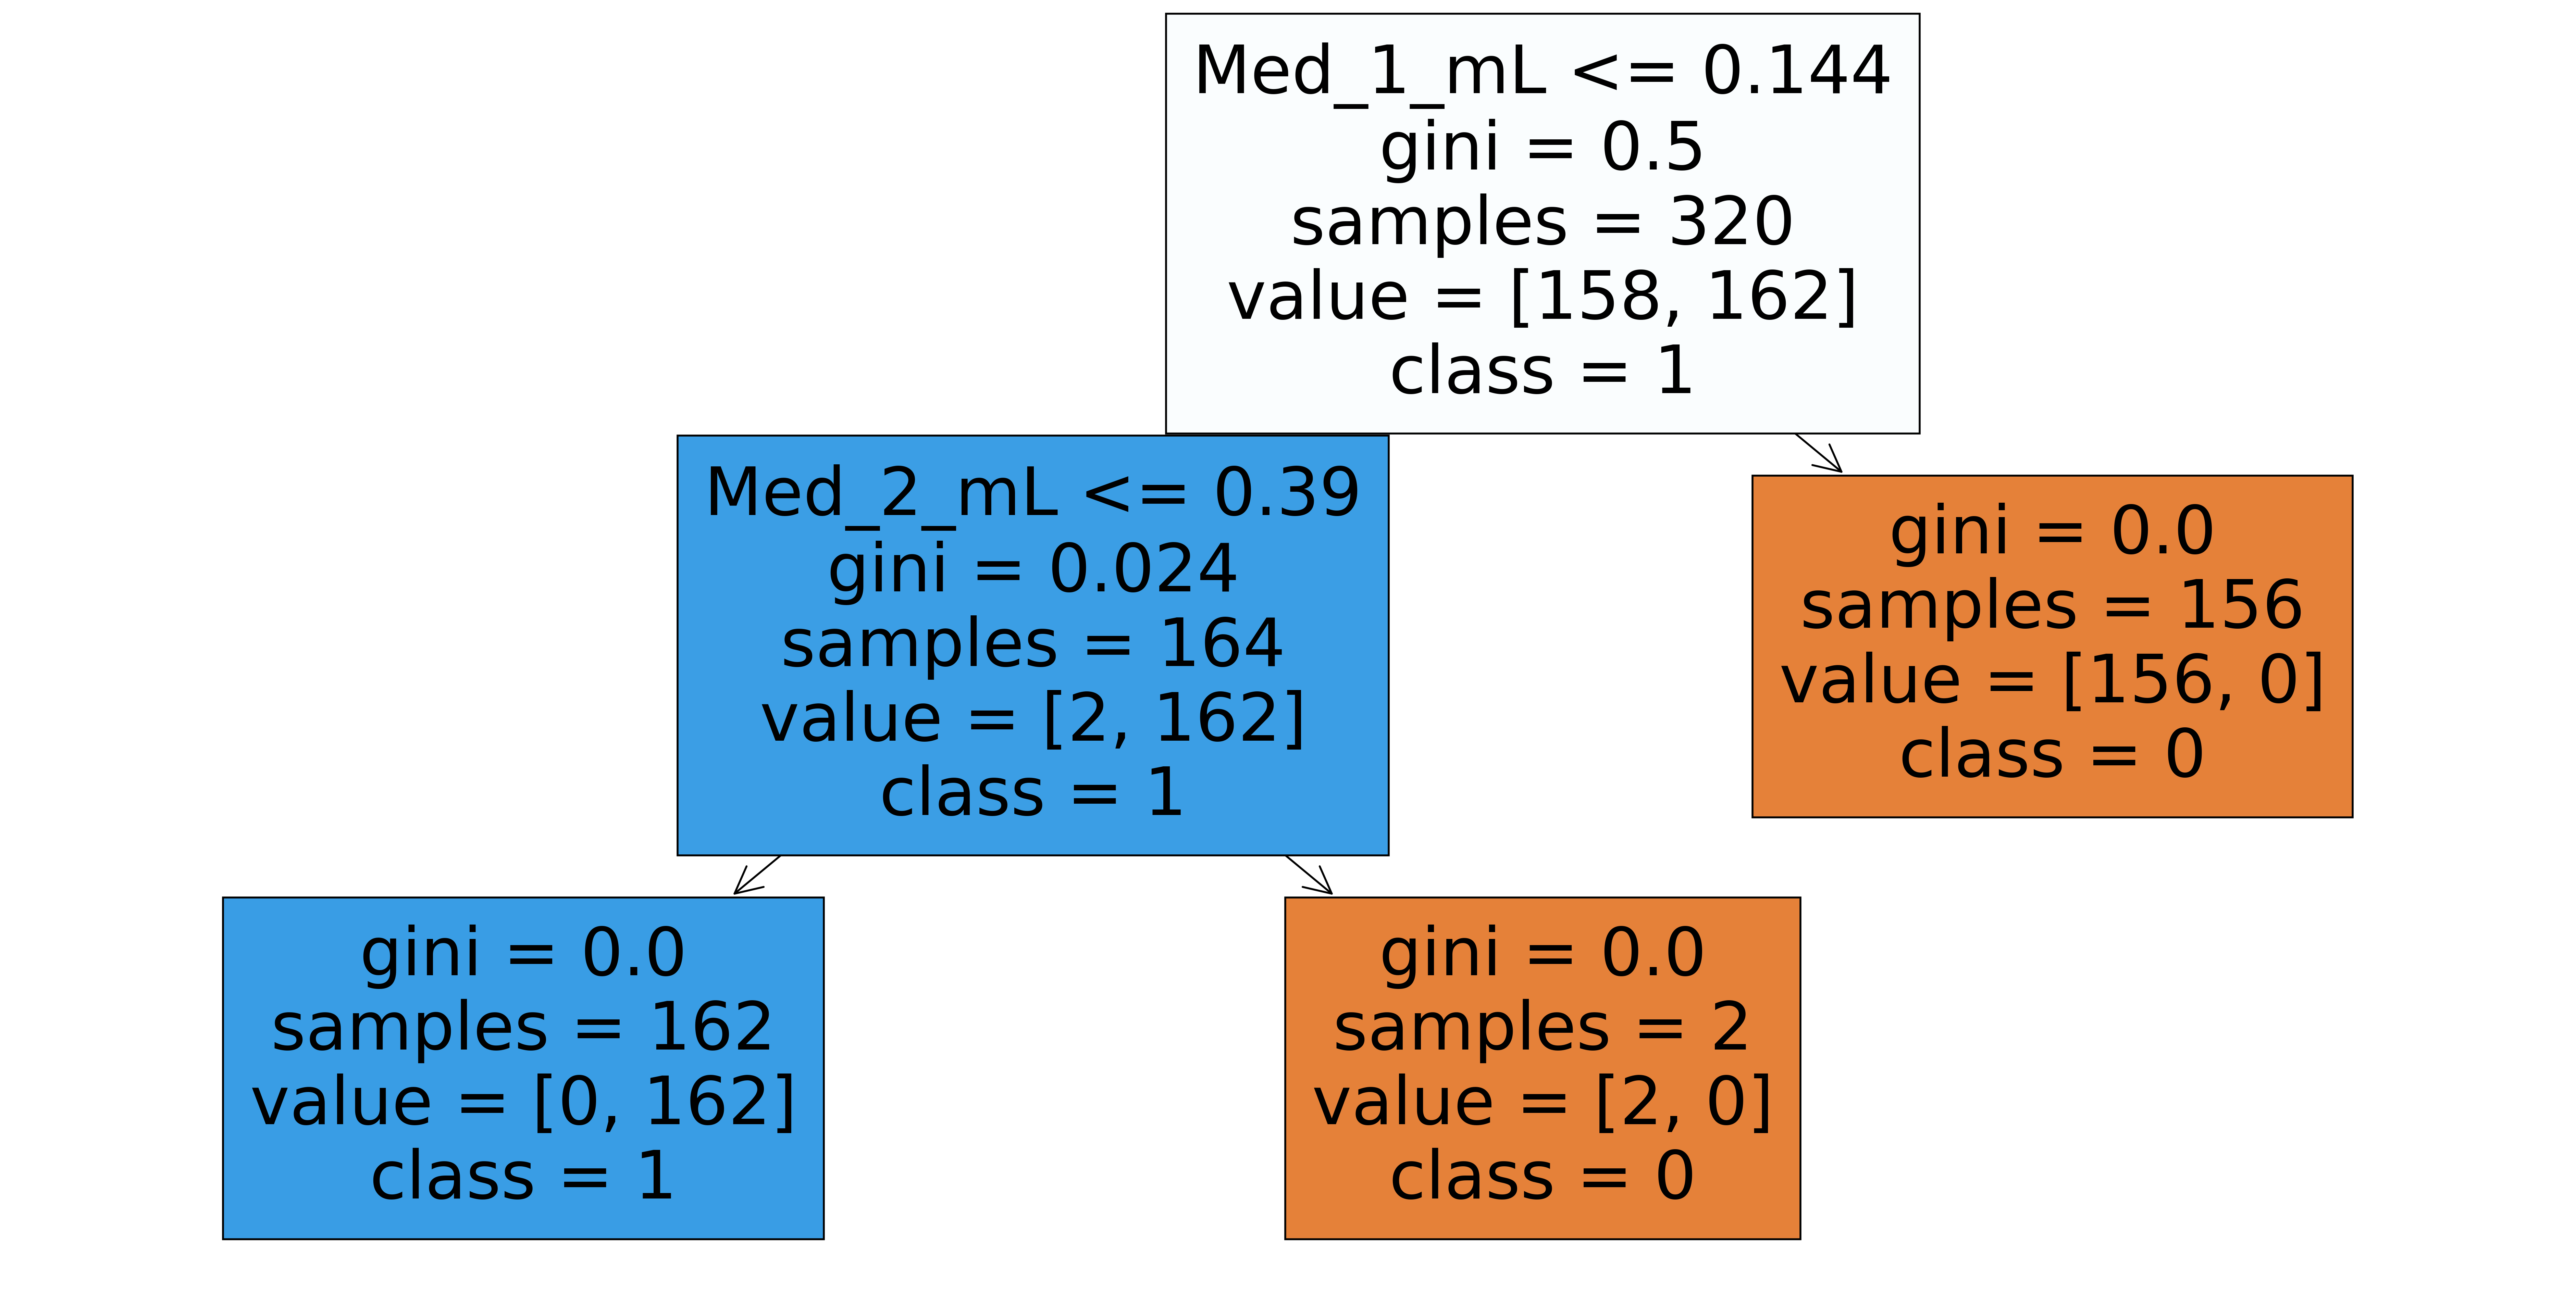

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24, 12), dpi=400)
plot_tree(dt_default, filled=True, feature_names=['Med_1_mL', 'Med_2_mL', 'Virus Present'], class_names=['0', '1'])
plt.show()

### Hyperparameter Tuning for Decision Tree Clssifier

In [27]:
from sklearn.model_selection import GridSearchCV

# model
estimator = DecisionTreeClassifier(random_state=0)

# parameters (which you want to tune and identify the best)
param_grid = {'criterion':['gini', 'entropy'],
             'max_depth':[1, 2, 3, 4, 5]}

grid = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [28]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=0)

#### Importance of each feature given by this model

In [29]:
data = grid.best_estimator_.feature_importances_
feats = pd.DataFrame(data, index=X.columns, columns=['Feature Importance'])
feats

Feature Importance
Med_1_mL            0.975301
Med_2_mL            0.024699

In [30]:
feats_imp = feats[feats['Feature Importance']>0]
feats_imp

Feature Importance
Med_1_mL            0.975301
Med_2_mL            0.024699

In [31]:
important_features_list = feats_imp.index.to_list()
important_features_list

['Med_1_mL', 'Med_2_mL']

## Final DecisionTree Model
#### with best hyperparameter & with important features

In [32]:
# input with important features
X_imp = X[important_features_list]

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=6)

# Model with best hyperparameters
final_dt_model = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
final_dt_model.fit(X_train, y_train)

ypred_train = final_dt_model.predict(X_train)
ypred_test = final_dt_model.predict(X_test)

# Evaluation
print('Train accuracy:', accuracy_score(ypred_train, y_train))
print('Test accuracy:', accuracy_score(ypred_test, y_test))
print('Cross Validation Score:', cross_val_score(final_dt_model, X_imp, y, cv=5).mean())

Train accuracy: 1.0
Test accuracy: 0.9875
Cross Validation Score: 0.9925


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred_test)

array([[35,  0],
       [ 1, 44]], dtype=int64)

### EXAMPLE

In [34]:
df = pd.DataFrame({'X':[2, 3, 4, 6, 7,  8, 9, 10, 11], 'Output':['r', 'r', 'r', 'g', 'g', 'g', 'r', 'r', 'r']})
df.head(2)

X Output
0  2      r
1  3      r

In [35]:
X = df[['X']]
y = df['Output']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# modelling
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Prediction
ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, ypred_train))
print(accuracy_score(y_test, ypred_test))

1.0
1.0


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
estimator = SVC()
param_grid = {'C' : [0.01, 0.1, 1, 10, 100], 'kernel':['rbf', 'linear',  'poly', 'signoid']}

full_cv_classifier = GridSearchCV(estimator, param_grid, cv=4, scoring='accuracy')
full_cv_classifier.fit(X_train, y_train)
full_cv_classifier.best_params_

{'C': 1, 'kernel': 'rbf'}

In [39]:
# modelling
from sklearn.svm import SVC
svm_model2 = SVC(C=1, kernel='rbf')
svm_model2.fit(X_train, y_train)

# Prediction
ypred_train = svm_model2.predict(X_train)
ypred_test = svm_model2.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, ypred_train))
print(accuracy_score(y_test, ypred_test))


1.0
1.0
